# Prérequis

- Règle sur les puissances
- Décomposition en base
- Division euclidenne

# L'exponentiation binaire

L'exponentiation binaire (ou l'exponentation rapide) est un algorithme utilisé pour calculer rapidement de grandes puissances entières. Naïvement, pour calculer $x^n$ il convient de multiplier x par lui-même n fois.
On peut procéder d'une manière un peu plus subtile pour diminuer le nombre de calcul:   
On décompose la puissance en base 2 i.e  $ n = \sum_{k=0}^{d}a_k2^k $ pour $a_k \in \{0,1\}$.  
Alors $x^n = x^{\sum_{k=0}^{d}a_k2^k} = x^{a_0}(x^2)^{a_1}(x^{2^2})^{a_2}...(x^{2^d})^{a_d}$  

**Explication de l'algorithme** 

Soit n un entier strictement supérieur à 1.  
- Si n = 0 alors $x^n = 1$
- Si n est pair alors $x^n = (x^2)^{\frac{n}{2}}$. Il suffit alors de calculer $x^n = (x^p)^2$
- Si n est impair alors $x^n = (x^p)^2x$  

En prenant des exemples simples ($10^{16}$ par exemple) que cette méthode est très efficace ! Au lieu de faire 16 multiplication, on en fait que 5.


In [33]:
import timeit
import random
import matplotlib.pyplot as plt

In [34]:
def decomposer_nombre(x, base):
    if base <= 1:
        raise ValueError("La base doit être supérieure à 1")

    decomposition = []
    puissance = 1

    # Trouver la plus grande puissance de la base qui est inférieure ou égale à n
    while puissance * base <= x:
        puissance *= base

    # Réduire la puissance et décomposer le nombre
    while puissance > 0:
        coefficient = x // puissance
        decomposition.append(coefficient)
        x -= coefficient * puissance
        puissance //= base

    return decomposition

In [20]:
def exponentiation_rapide(x:int, n:int):
    if n < 0:
        raise ValueError("La puissance doit être positive")
    if n == 0:
        return 1
    if n == 1:
        return x
    if n%2 == 0:
        return exponentation_rapide(x**2, n//2)
    else:
        return x*exponentation_rapide(x**2, (n-1)//2)

In [23]:
def exponentiation_naive(x:int, n:int):
    if n < 0:
        raise ValueError("La puissance doit être positive")
    resultat=1
    for _ in range(n):
        resultat*=x
    return resultat

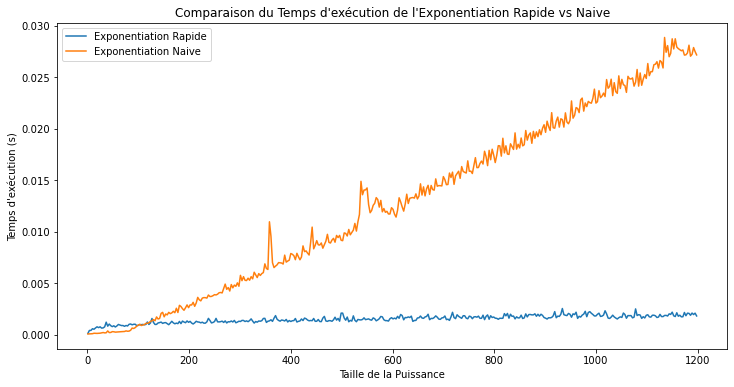

In [36]:
echantillon = [(121,n) for n in range(1,1200,3)] 

temps_fonction1 = [timeit.timeit(lambda: exponentiation_rapide(n[0],n[1]), number=100) for n in echantillon]
temps_fonction2 = [timeit.timeit(lambda: exponentiation_naive(n[0],n[1]), number=100) for n in echantillon]

tailles_puissance = [n[1] for n in echantillon]

plt.figure(figsize=(12, 6))
plt.plot(tailles_puissance, temps_fonction1, label='Exponentiation Rapide')
plt.plot(tailles_puissance, temps_fonction2, label='Exponentiation Naive')
plt.xlabel('Taille de la Puissance')
plt.ylabel('Temps d\'exécution (s)')
plt.title('Comparaison du Temps d\'exécution de l\'Exponentiation Rapide vs Naive')
plt.legend()
plt.show()

On remarque bien la différence de complexité en temps de ces deux algorithmes. L'un est un $O(n)$ et l'autre un $O(log(n))$.